# Problem Statement

Agriculture is dependent on climatic and soil conditions as well as other factors. Weather conditions are unpredictable and different for different regions. This makes it difficult for agricultural producers referred to as users in the rest of the report, to properly utilize and optimize their lands for crop cultivation.

Therefore, this project aims to develop a robust predictive model that suggests the most suitable crops to grow based on climatic and soil conditions in order to provide data-driven insight, as a result, enable agricultural producers make informed decisions for optimizing agricultural productivity and efficient crop cultivation.

# Business Impact

This project aims to address the challenge of determining the most suitable crops to cultivate based on specific climatic and soil conditions. By utilizing advanced predictive modeling techniques, the proposed solution will provide accurate and data-driven recommendations, enabling farmers and agricultural stakeholders to make informed decisions regarding crop selection for cultivation and improve productivity. This predictive model will take into account various environmental factors such as temperature, rainfall, soil composition, and nutrient levels, and provide reliable suggestions on the crops that are most likely to thrive under those conditions.

# Objective

1. Collect and analyze comprehensive climatic and soil data from reliable source.
2. Develop an efficient predictive model that utilizes machine learning algorithms to correlate climatic and soil variables with crop type.
3. Train the model using historical data on crop yields and environmental conditions to establish accurate patterns and relationships.
4. Validate the model's predictions by comparing them with real-world agricultural practices and outcomes.
5. Design a user-friendly and interactive interface that allows farmers to input their specific climatic and soil parameters and receive personalized crop recommendations.
6. Provide documentation and support to ensure easy adoption of the predictive model in agricultural communities.

# The Dataset

The dataset comprises columns providing information on soil condition requirements for various crops. These columns include the ratios of Nitrogen, Phosphorus, Potassium, and Soil pH. Additionally, the dataset contains data on the climatic conditions necessary for optimal crop growth, such as Temperature, Humidity, and Rainfall. Lastly, the dataset includes a label column consisting of 22 distinct crops, such as Rice, Banana, Grapes, Mango, among others; enabling the classification and analysis of crop types based on the provided data.

The project aims to utilize the dataset's valuable information on soil and climatic conditions to train a machine learning predictive model. This model will employ advanced algorithms to analyze the relationships between soil composition, climatic factors, and crop suitability. By leveraging this model, users will be able to input specific soil and climatic parameters, and receive accurate predictions on the crop that is most likely to thrive under those conditions. Ultimately, the goal is to empower farmers and agricultural stakeholders with a reliable tool for informed decision-making regarding crop selection based on soil and climatic conditions.

# Import Necessary Libraries

In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Interactivity
from ipywidgets import interact

# For Implementing the Machine Learning Algorithm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data = pd.read_csv('Agriculture.csv')

In [3]:
# Check data shape
data.shape

(2200, 8)

The dataset comprises 2200 rows and 8 columns containing information on soil and climatic conditions of crops.

In [4]:
# Check data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Machine learning algorithms require complete and consistent data to effectively learn patterns and make accurate predictions. Missing values can disrupt the learning process and lead to unreliable results. Hence, it is crucial to identify and handle missing values appropriately. The next step in this process involves performing a comprehensive assessment of the dataset to identify any missing values present in the columns. This process will enable the implementation of suitable strategies, such as imputation or removal of missing values, to ensure the dataset is complete and ready for further analysis and modeling.

In [5]:
#Check for missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The dataset looks well structured and free of any missing values, indicating a clean and complete dataset.

In [6]:
#Check for distinct crops in the dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
# Check summary for all crops
print(f"The average Nitrogen in the soil is: {data['N'].mean():.2f}")
print(f"The average Phosphorus in the soil is: {data['P'].mean():.2f}")
print(f"The average Potassium in the soil is: {data['K'].mean():.2f}")
print(f"The average temperature(˚C) is: {data['temperature'].mean():.2f}")
print(f"The average % humidity is: {data['humidity'].mean():.2f}")
print(f"The average pH level of soil is: {data['ph'].mean():.2f}")
print(f"The average rainfall(mm) is: {data['rainfall'].mean():.2f}")

The average Nitrogen in the soil is: 50.55
The average Phosphorus in the soil is: 53.36
The average Potassium in the soil is: 48.15
The average temperature(˚C) is: 25.62
The average % humidity is: 71.48
The average pH level of soil is: 6.47
The average rainfall(mm) is: 103.46


# Analyzing Soil and Climatic Conditions for Various Crops

To enhance user experience and facilitate the practical application of the predictive model, an interactive function will be created. This function will accept input data, including soil and climatic conditions, and utilize the trained predictive model to generate recommendations for suitable crops. The function will ensure that the output results are presented in a well-formatted manner, providing easily understandable and actionable information for users.

In [8]:
# Find the soil and climatic condition for each crop
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print('--------------------------------------------')
    print('Statistics for Nitrogen')
    print(f'Minimum Nitrogen required: {x["N"].min():.2f}')
    print(f'Average Nitrogen required: {x["N"].mean():.2f}')
    print(f'Maximum Nitrogen required: {x["N"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for Phosphorus')
    print(f'Minimum Phosphorus required: {x["P"].min():.2f}')
    print(f'Average Phosphorus required: {x["P"].mean():.2f}')
    print(f'Maximum Phosphorus required: {x["P"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for Potassium')
    print(f'Minimum Potassium required: {x["K"].min():.2f}')
    print(f'Average Potassium required: {x["K"].mean():.2f}')
    print(f'Maximum Potassium required: {x["K"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for Temperature')
    print(f'Minimum Temperature required: {x["temperature"].min():.2f}')
    print(f'Average Temperature required: {x["temperature"].mean():.2f}')
    print(f'Maximum Temperature required: {x["temperature"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for Humidity')
    print(f'Minimum Humidity required: {x["humidity"].min():.2f}')
    print(f'Average Humidity required: {x["humidity"].mean():.2f}')
    print(f'Maximum Humidity required: {x["humidity"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for pH Level')
    print(f'Minimum pH Level required: {x["ph"].min():.2f}')
    print(f'Average pH Level required: {x["ph"].mean():.2f}')
    print(f'Maximum pH Level required: {x["ph"].max():.2f}')
    print('--------------------------------------------')
    print('Statistics for Rainfall')
    print(f'Minimum Rainfall required: {x["rainfall"].min():.2f}')
    print(f'Average Rainfall required: {x["rainfall"].mean():.2f}')
    print(f'Maximum Rainfall required: {x["rainfall"].max():.2f}')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

The interactive function enables user interaction with the code, allowing selection of the soil and climatic requirements for any crop of interest from the provided list. For example, for mango crop, analysis reveals that the minimum temperature requirement is 27˚C, the maximum temperature requirement is 31.21˚C, and the maximum temperature requirement is 35.99˚C. These temperature requirements indicate that mango is a crop suited for warmer climates, suggesting it is typically grown during the summer season. Additionally, the rainfall requirement for rice is observed to be substantial indicating that rice cultivation thrives in climatic conditions with high rainfall, typically during the rainy season.

# Comparing Crop Requirements to Average Conditions: Evaluating the Average Requirements of Each Crop

In [9]:
# Comparing Crop Requirements to Average Conditions
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print(f'Average Value for {conditions} is {data[conditions].mean():.2f}')
    print('--------------------------------------------')
    print(f'Rice: {data[data["label"] == "rice"][conditions].mean():.2f}')
    print(f'Maize: {data[data["label"] == "maize"][conditions].mean():.2f}')
    print(f'Jute: {data[data["label"] == "jute"][conditions].mean():.2f}')
    print(f'Cotton: {data[data["label"] == "cotton"][conditions].mean():.2f}')
    print(f'Coconut: {data[data["label"] == "coconut"][conditions].mean():.2f}')
    print(f'Papaya: {data[data["label"] == "papaya"][conditions].mean():.2f}')
    print(f'Orange: {data[data["label"] == "orange"][conditions].mean():.2f}')
    print(f'Apple: {data[data["label"] == "apple"][conditions].mean():.2f}')
    print(f'Muskmelon: {data[data["label"] == "muskmelon"][conditions].mean():.2f}')
    print(f'Watermelon: {data[data["label"] == "watermelon"][conditions].mean():.2f}')
    print(f'Grapes: {data[data["label"] == "grapes"][conditions].mean():.2f}')
    print(f'Mango: {data[data["label"] == "mango"][conditions].mean():.2f}')
    print(f'Banana: {data[data["label"] == "banana"][conditions].mean():.2f}')
    print(f'Pomegranate: {data[data["label"] == "pomegranate"][conditions].mean():.2f}')
    print(f'Lentil: {data[data["label"] == "lentil"][conditions].mean():.2f}')
    print(f'Blackgram: {data[data["label"] == "blackgram"][conditions].mean():.2f}')
    print(f'Mungbea : {data[data["label"] == "mungbean"][conditions].mean():.2f}')
    print(f'Mothbeans: {data[data["label"] == "mothbeans"][conditions].mean():.2f}')
    print(f'Pigeonpeas: {data[data["label"] == "pigeonpeas"][conditions].mean():.2f}')
    print(f'Kidneybeans: {data[data["label"] == "kidneybeans"][conditions].mean():.2f}')
    print(f'Chickpea: {data[data["label"] == "chickpea"][conditions].mean():.2f}')
    print(f'Coffee: {data[data["label"] == "coffee"][conditions].mean():.2f}')


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

Within the function, the climatic and soil conditions have been explicitly specified as parameters to enable a targeted comparison of crops. These specified conditions serve as the basis for assessing and contrasting the requirements of various crops. After specifying the conditions, the code proceeds to calculate and display the average requirements for each crop. This involves analyzing the relevant data pertaining to climatic and soil requirements for each crop in the dataset.
Again we see that rice requires heavy rainfall among the other crops listed. On the other hand, fruits like muskmelon and watermelon exhibit contrasting requirements when it comes to rainfall. These fruits can thrive with minimal rainfall, unlike rice. They are comparatively more adaptable to drier conditions, making them resilient choices for cultivation in areas with limited rainfall or where irrigation systems are available. This aligns with the knowledge that cooler temperatures and excessive rainfall can impede growth and maturity of watermelon fruit.

# Analyzing Crops: Below-Average and Above-Average Soil/Climatic Requirements

To further improve the analysis and make it more intuitive, an additional step will be taken to categorize crops based on their soil and climatic requirements. This categorization will involve segregating crops into two groups: those with below-average requirements and those with above-average requirements for the specified soil and climatic conditions.

By categorizing crops in this manner, the analysis will provide a clearer distinction between crops that have relatively lower demands and those that have higher demands in terms of soil and climatic factors. Crops with below-average requirements can be considered as potentially more adaptable and flexible, making them suitable choices for regions with less optimal soil or climatic conditions. On the other hand, crops with above-average requirements may have specific environmental needs that need to be met for successful cultivation.

In [10]:
# Specifying function for more intuitiveness
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print('Crops which require below-average', conditions, ':\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())
    print('--------------------------------------------')
    print('Crops which require above-average', conditions, ':\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Visualization:  Distribution of Conditions for All Crops

This section delves into the distribution of soil and climatic conditions for all crops under consideration. It presents a comprehensive overview of each column's potential values along with their respective frequencies. This visualization aids in identifying anomalies or outliers within the data and provides insights into the overall patterns. Analyzing the distribution of these conditions throughout the crop dataset empowers users to grasp the spectrum of conditions conducive to optimal growth and productivity for each crop.

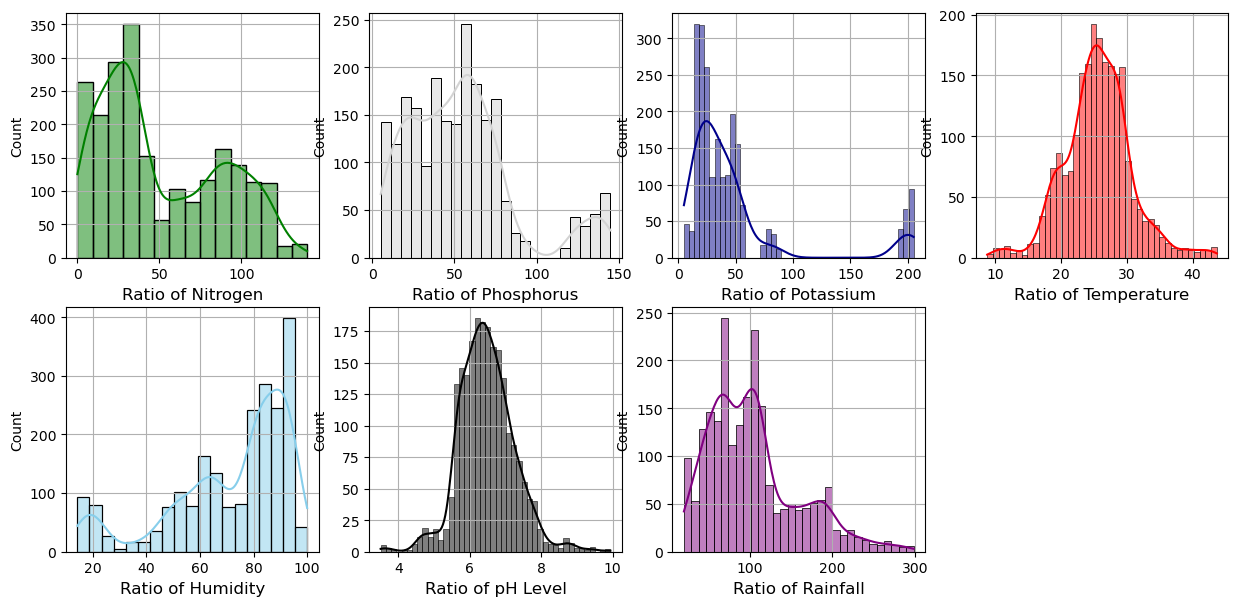

In [11]:
# Distribution of Soil and Climatic Conditions
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.histplot(data['N'], color='green', kde=True)
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(data['P'], color='lightgrey', kde=True)
plt.xlabel('Ratio of Phosphorus', fontsize=12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(data['K'], color='darkblue', kde=True)
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(data['temperature'], color='red', kde=True)
plt.xlabel('Ratio of Temperature', fontsize=12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(data['humidity'], color='skyblue', kde=True)
plt.xlabel('Ratio of Humidity', fontsize=12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(data['ph'], color='black', kde=True)
plt.xlabel('Ratio of pH Level', fontsize=12)
plt.grid()

plt.subplot(2, 4, 7)
sns.histplot(data['rainfall'], color='purple', kde=True)
plt.xlabel('Ratio of Rainfall', fontsize=12)
plt.grid()



The distribution visualization reveals that certain crops exhibit a notable demand for a substantial proportion of Phosphorus, Potassium and rainfall evident from the highly skewed distribution charts for these conditions. Additionally, distinct crops demonstrate varying preferences for temperature and pH levels, with some requiring higher values while others thrive in lower ranges for optimal growth.

In [12]:
# Finding Interesting Patterns by setting Thresholds
print('Some Interesting Patterns')
print('--------------------------------------------')
print('Crops with High soil Nitrogen requirement', data[data['N'] > 120]['label'].unique())
print('Crops with High soil Phosphorus requirement', data[data['P'] > 100]['label'].unique())
print('Crops with High soil Potassium requirement', data[data['K'] > 200]['label'].unique())
print('Crops with very Low Temperature requirement', data[data['temperature'] < 10]['label'].unique())
print('Crops with very High Temperature requirement', data[data['temperature'] > 40]['label'].unique())
print('Crops with very Low Humidity requirement', data[data['humidity'] < 20]['label'].unique())
print('Crops with very Low pH Level requirement', data[data['ph'] < 4]['label'].unique())
print('Crops with very High pH Level requirement', data[data['ph'] > 9]['label'].unique())
print('Crops with very Low rainfall requirement', data[data['rainfall'] < 50]['label'].unique())
print('Crops with very High rainfall requirement', data[data['rainfall'] > 200]['label'].unique())

Some Interesting Patterns
--------------------------------------------
Crops with High soil Nitrogen requirement ['cotton']
Crops with High soil Phosphorus requirement ['grapes' 'apple']
Crops with High soil Potassium requirement ['grapes' 'apple']
Crops with very Low Temperature requirement ['grapes']
Crops with very High Temperature requirement ['grapes' 'papaya']
Crops with very Low Humidity requirement ['chickpea' 'kidneybeans']
Crops with very Low pH Level requirement ['mothbeans']
Crops with very High pH Level requirement ['mothbeans']
Crops with very Low rainfall requirement ['mothbeans' 'mungbean' 'lentil' 'watermelon' 'muskmelon' 'papaya']
Crops with very High rainfall requirement ['rice' 'papaya' 'coconut']


The provided code allows us to filter out crops based on their extreme soil and climatic conditions. By setting minimum and maximum thresholds for each condition, we can identify crops that meet these specific requirements.

For example, cotton requires high soil and climatic conditions. Grapes and apples have a very high requirement for phosphorus and potassium soil nutrients. Rice and coconut thrive in high-temperature environments. On the other hand, crops like mothbeans, mungbeans, lentils, watermelons, and muskmelons are adapted to low rainfall conditions. 

Papaya demonstrates remarkable adaptability to varying rainfall conditions, showcasing its versatility. This adaptability can be attributed to the inherent resilience of the papaya fruit, allowing it to adjust its growth patterns to suit different environmental conditions. As a result, papaya can flourish in environments with both limited and abundant rainfall. It's worth noting that mothbeans can also grow in both low and high soil pH levels.

# Optimal Crop Selection for Different Seasons: Summer, Winter, and Rainy Season

In [13]:
#Summer, winter and rainy season crops

# Crops Suitable for Summer
summer_crops = data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique()

# Crops Suitable for Winter
winter_crops = data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique()

# Crops Suitable for Rainy Season
rainy_crops = data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique()

# Display the results
print("Crops Suitable for Summer:", summer_crops)
print('----------------------------------------------------------------------------------------------------')
print("Crops Suitable for Winter:", winter_crops)
print('----------------------------------------------------------------------------------------------------')
print("Crops Suitable for Rainy Season:", rainy_crops)


Crops Suitable for Summer: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------------------------------------------------------------------------
Crops Suitable for Winter: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------------------------------------------------------------------------------------
Crops Suitable for Rainy Season: ['rice' 'papaya' 'coconut']


The crops that are suitable for the summer season are characterized by high temperature (>30˚C) and high humidity (>50%). Result shows that pigeonpeas, mothbeans, blackgram, mango, grapes, orange and papaya are best suited for growing in hot and humid conditions of the summer season.
Crops such as maize, pigeonpeas, lentil, pomegranate, grapes and orange are suitable for the winter season, characterized by low temperature (<20˚C) and moderate humidity (>30%). 
The crops that are suitable for the rainy season, characterized by high rainfall (>200 mm) and moderate humidity (>30%) includes rice, papaya and coconut.
This outcome underscores the adaptability of certain crops like pigeonpeas, grapes, orange and papaya to varying seasons throughout the year. They can thrive in different climatic conditions, making them versatile options for cultivation across multiple seasons.

# Clustering Analysis

Clustering analysis is a valuable technique used to classify observations into meaningful groups. In this context, the aim is to identify similar crops that can assist agricultural producers in exploring alternative farming options. This process falls under the category of unsupervised learning, meaning no predefined labels will be provided for training the data. Instead, existing patterns within the data will be leveraged to identify similarities among crops. To accomplish this, k-means clustering algorithm will be employed.

In [14]:
# Drop 'label' column for clustering analysis
x_data = data.drop(columns=['label']).values

# Shape of x_data
print(x_data.shape)

# Convert data into dataframe
x_data = pd.DataFrame(x_data)
x_data.head()


(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


# Elbow Plot

The elbow chart will be used to determine the number of clusters.

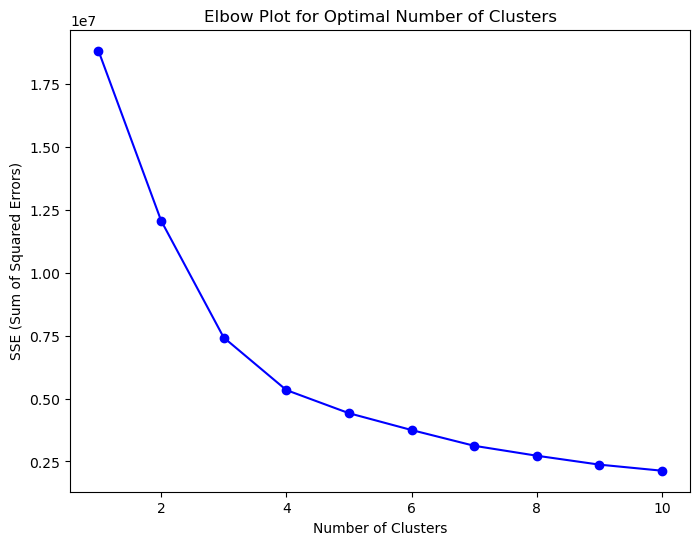

In [15]:
# Determine the optimal number of clusters using the elbow method
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

Based on the elbow plot analysis, it is determined that the optimal number of clusters for the dataset is 4 clusters. This means that the crops in the dataset can be grouped into 4 distinct clusters, each representing a different set of characteristics or similarities among the crops.

In [16]:
# Perform k-means clustering with the optimal number of clusters
k = 4
optimal_kmeans = KMeans(n_clusters = k, random_state = 0)
data['cluster'] = optimal_kmeans.fit_predict(x_data)

# Display the crops in each cluster
for i in range(k):
    cluster_crops = data[data['cluster'] == i]['label'].unique()
    print(f'Cluster {i+1} crops:', cluster_crops)
    print('--------------------------------------------------------------------------')


Cluster 1 crops: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------------------------------------------
Cluster 2 crops: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------------------------------
Cluster 3 crops: ['grapes' 'apple']
--------------------------------------------------------------------------
Cluster 4 crops: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
--------------------------------------------------------------------------


Each cluster contains specific crops that tend to exhibit similarities in terms of their requirements, growth patterns, or other factors. 
Cluster 1 includes a diverse range of crops such as maize, chickpea, kidney beans, pigeonpeas, lentil and others. Cluster 2 consists of crops like maize, banana, watermelon, and muskmelon, along with papaya, cotton, and coffee. Cluster 3 is composed of grapes and apple. Lastly, Cluster 4 includes crops such as rice, pigeonpeas, papaya, coconut, jute, and coffee.

These cluster assignments can provide insights for agricultural producers in terms of identifying groups of crops that share common characteristics and may require similar cultivation practices or environmental conditions.

# Predictive Model

In developing the predictive model, a machine learning approach will be employed to categorize suitable crops based on identified soil and climatic conditions. The dataset will be partitioned into training (80%) and testing (20%) data to facilitate robust model training and evaluation. Logistic Regression will be used because of its probabilistic nature and adaptability in handling multi-class classification/clustering scenarios. By leveraging the strengths of logistic regression, the likelihood of an observation falling into a specific class based on its associated features can be accurately predicted.

In [17]:
# x_data is the feature data
x = x_data
# data['label'] is the target variable
y = data['label']


# Split data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state = 0)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.97

Confusion Matrix:
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  1  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]


The model achieved an impressive accuracy of 97%, underscoring its efficacy in predicting crop categories with a high level of correctness. The confusion matrix provided additional insights into the model's performance, detailing the counts of true positive, true negative, false positive, and false negative predictions for each crop category. Furthermore, the evaluation metrics such as precision, recall, and F1-score for individual crop classes, offers a understanding of the model's effectiveness across diverse agricultural crop categories. 

This predictive model, shows promising potential for assisting users in making informed decisions about optimal crop selection based on prevailing environmental conditions, thereby contributing to enhanced agricultural practices and productivity.

The next step is to evaluate the accuracy of the prediction model.  I will input the soil and climatic conditions into the model and observe the output. The output will indicate the crop that is most suitable for the given conditions. By comparing the predicted crop with the actual crop that is ideal for the provided soil and climatic conditions, I can assess the accuracy of the model in making appropriate crop recommendations. This evaluation process will help in determining the effectiveness and reliability of the prediction model in suggesting the most suitable crops based on the given soil and climatic factors.

In [18]:
# Check data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3


In [20]:
# Make predictions
input_conditions = [[89, 40, 42, 20, 81, 7, 200]]
prediction = model.predict(input_conditions)

# Print the predicted crop
print("The suggested crop for given condition is : ", prediction)                             

The suggested crop for given condition is :  ['rice']


In [27]:
#Check the true conditions for grape and compare
data[data['label'] == 'grapes'].head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes,2
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes,2
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes,2
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes,2
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes,2


In [28]:
# Make predictions
input_conditions = [[25, 145, 203, 32, 83, 6.0, 65]]
prediction = model.predict(input_conditions)

# Print the predicted crop
print("The suggested crop for given condition is : ", prediction)                             

The suggested crop for given condition is :  ['grapes']


In [29]:
data[data['label'] == 'lentil'].head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil,0
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil,0
802,38,60,20,29.848231,60.638726,7.491217,46.804526,lentil,0
803,11,74,17,21.363838,69.923759,6.633865,46.635286,lentil,0
804,37,71,16,26.286639,68.519667,7.324863,46.138330,lentil,0


In [30]:
# Now you can make predictions
input_conditions = [[32, 76, 15, 28.05, 69, 7.5, 46]]
prediction = model.predict(input_conditions)

# Print the predicted crop
print("The suggested crop for given condition is : ", prediction)      

The suggested crop for given condition is :  ['lentil']


In [31]:
# Now you can make predictions
input_conditions = [[20, 30, 10, 15, 90, 7.5, 100]]
prediction = model.predict(input_conditions)

# Print the predicted crop
print("The suggested crop for given condition is : ", prediction)      

The suggested crop for given condition is :  ['orange']


In [32]:
#Check the true conditions for orange and compare
data[data['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange,0
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange,0
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange,0
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange,0
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange,0


Based on the provided input conditions and the subsequent prediction, the model appears to be performing effectively. The suggested crops, 'rice', 'lentil' and 'grape' aligns well with the specified combination of soil and climatic factors, including nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, and rainfall. The high accuracy of the model, as demonstrated by an accuracy score of 97%, along with a comprehensive evaluation using metrics such as precision, recall, and the confusion matrix, further supports its reliability. The consistency between the predicted crop and the expected outcomes based on domain knowledge and historical data reinforces the confidence in the model's ability to recommend suitable crops for given agricultural conditions. Continuous monitoring and validation against real-world observations will contribute to ongoing improvements, ensuring the model remains a valuable tool for crop recommendation in diverse agricultural scenarios.